<a href="https://colab.research.google.com/github/KAILASHVenkat/IT304M/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
!pip install ucimlrepo

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np

from ucimlrepo import fetch_ucirepo

bank_marketing = fetch_ucirepo(id=222)

In [161]:
df = bank_marketing.data.features
df_target = bank_marketing.data.targets
df_combined = df.join(df_target)
df_combined


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [162]:
cat_cols=df_combined.select_dtypes('object').columns.tolist()
num_cols=df_combined.select_dtypes('int64').columns.tolist()

In [163]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [164]:
for x in df_combined.columns:
  if x not in ["contact", "poutcome"]:
    df_combined[x].fillna(df_combined[x].mode()[0], inplace=True)
  else:
    df_combined[x].fillna("Unknown", inplace=True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [165]:
df_combined

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,Unknown,5,may,261,1,-1,0,Unknown,no
1,44,technician,single,secondary,no,29,yes,no,Unknown,5,may,151,1,-1,0,Unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,Unknown,5,may,76,1,-1,0,Unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,Unknown,5,may,92,1,-1,0,Unknown,no
4,33,blue-collar,single,secondary,no,1,no,no,Unknown,5,may,198,1,-1,0,Unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,Unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,Unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,Unknown,no


In [166]:
for x in cat_cols:
  print(df_combined[x].value_counts())

job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64
default
no     44396
yes      815
Name: count, dtype: int64
housing
yes    25130
no     20081
Name: count, dtype: int64
loan
no     37967
yes     7244
Name: count, dtype: int64
contact
cellular     29285
Unknown      13020
telephone     2906
Name: count, dtype: int64
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64
poutcome
Unknown    36959
failure     4901
other       1840
success     1511
Nam

In [167]:
df_combined['job'].replace({'student':'unemployed','housemaid' : 'unemployed'},inplace=True)

In [168]:
print(df_combined['job'].value_counts())

job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
unemployed        3481
retired           2264
self-employed     1579
entrepreneur      1487
Name: count, dtype: int64


In [169]:
for x in num_cols:
  print(df[x].isnull().sum())

0
0
0
0
0
0
0


In [170]:
category_mapping = {'primary': 1, 'secondary': 2, 'tertiary': 3}

df_combined['education'] = df_combined['education'].map(category_mapping)

In [171]:
df_combined['education'].unique()

array([3, 2, 1])

In [172]:
category_mapping = {'jan' : 1,'feb' : 2 , 'mar' : 3, 'apr' : 4 , 'may' : 5 , 'jun' : 6 , 'jul' : 7 , 'aug' : 8 , 'sep' : 9 , 'oct' : 10 , 'nov' : 11 , 'dec' : 12}

df_combined['month'] = df_combined['month'].map(category_mapping)

In [173]:
df_combined['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

In [174]:
df_combined.loc[df_combined['pdays'] == -1, 'pdays'] = 'not contacted'
df_combined.loc[df_combined['pdays'] != 'not contacted', 'pdays'] = 'contacted'


<ipython-input-174-ad2b7f8aa38f>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'not contacted' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_combined.loc[df_combined['pdays'] == -1, 'pdays'] = 'not contacted'


In [175]:
df_combined['pdays'].unique()

array(['not contacted', 'contacted'], dtype=object)

In [176]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  int64 
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  int64 
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  object
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  y            45211 non-null  object
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [177]:
scaler = MinMaxScaler()

In [178]:
num_cols=df_combined.select_dtypes('int64').columns.tolist()

In [179]:
scaler.fit(df_combined[num_cols])
df_combined[num_cols] = scaler.transform(df_combined[num_cols])

In [180]:
df_combined

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,1.0,no,0.092259,yes,no,Unknown,0.133333,0.363636,0.053070,0.000000,not contacted,0.000000,Unknown,no
1,0.337662,technician,single,0.5,no,0.073067,yes,no,Unknown,0.133333,0.363636,0.030704,0.000000,not contacted,0.000000,Unknown,no
2,0.194805,entrepreneur,married,0.5,no,0.072822,yes,yes,Unknown,0.133333,0.363636,0.015453,0.000000,not contacted,0.000000,Unknown,no
3,0.376623,blue-collar,married,0.5,no,0.086476,yes,no,Unknown,0.133333,0.363636,0.018707,0.000000,not contacted,0.000000,Unknown,no
4,0.194805,blue-collar,single,0.5,no,0.072812,no,no,Unknown,0.133333,0.363636,0.040260,0.000000,not contacted,0.000000,Unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,technician,married,1.0,no,0.080293,no,no,cellular,0.533333,0.909091,0.198658,0.032258,not contacted,0.000000,Unknown,yes
45207,0.688312,retired,divorced,0.0,no,0.088501,no,no,cellular,0.533333,0.909091,0.092721,0.016129,not contacted,0.000000,Unknown,yes
45208,0.701299,retired,married,0.5,no,0.124689,no,no,cellular,0.533333,0.909091,0.229158,0.064516,contacted,0.010909,success,yes
45209,0.506494,blue-collar,married,0.5,no,0.078868,no,no,telephone,0.533333,0.909091,0.103294,0.048387,not contacted,0.000000,Unknown,no


In [181]:
categorical_cols = df_combined.select_dtypes('object').columns.tolist()
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df_combined[categorical_cols] = ord_enc.fit_transform(df_combined[categorical_cols])
df_combined[categorical_cols]

,job,marital,default,housing,loan,contact,pdays,poutcome,y
0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,7.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
45206,7.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
45207,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
45208,4.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0
45209,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0


In [182]:
num_cols = df_combined.select_dtypes(include=np.number).columns.tolist()
num_cols

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day_of_week',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [183]:
from imblearn.over_sampling import RandomOverSampler

X = df_combined.drop(['y'], axis=1)
y = df_combined['y']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(f"OverSampling takes the count from : {len(df_combined)} to {len(X_resampled)}")

OverSampling takes the count from : 45211 to 79844


In [184]:
combined_oversampled=X_resampled.join(y_resampled)
num_cols = X_resampled.select_dtypes(include=np.number).columns.tolist()
input_cols = list(combined_oversampled.columns)[:-1]
target_col = 'y'
train_val_df, test_df = train_test_split(combined_oversampled, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()
model = LogisticRegression(solver='liblinear')
numeric_cols=input_cols

In [185]:
model.fit(train_inputs[num_cols], train_targets)
X_train = train_inputs[num_cols]
X_val = val_inputs[num_cols]
X_test = test_inputs[num_cols]
train_preds = model.predict(X_train)
accuracy_score(train_targets, train_preds)
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.83383698, 0.16616302],
       [0.22405154, 0.77594846]])

Accuracy: 80.51%


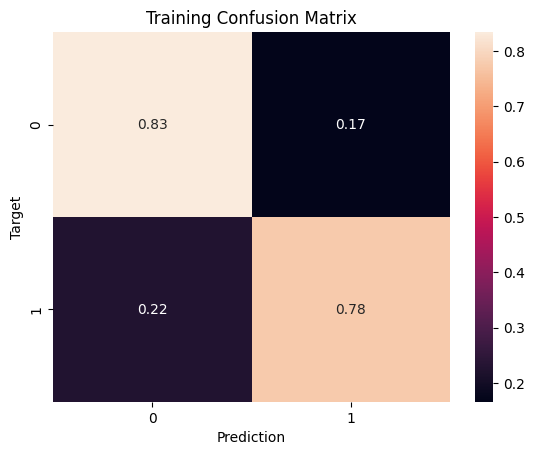

In [186]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

train_preds = predict_and_plot(X_train, train_targets, 'Training')


Accuracy: 80.64%


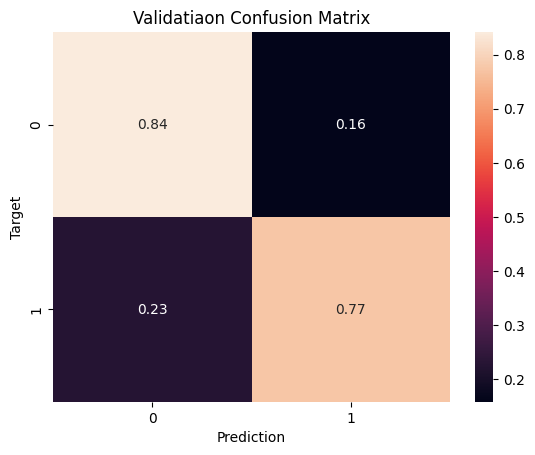

In [187]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 79.89%


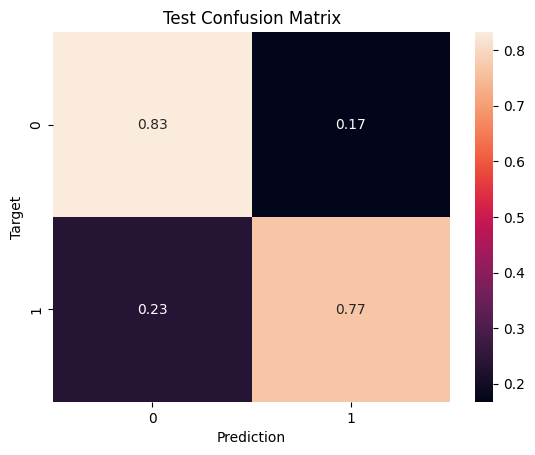

In [188]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')


In [190]:
num_cols

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day_of_week',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']